In [27]:
import pandas as pd
import scipy.stats as stats
df_indian = pd.read_csv('../../datasets/Indian.csv')
df_indian.head(3)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422


In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

### 30대는 '저축 비율'이 20대보다 더 높을 것이다.

In [29]:
# 연령대 기준 설정
bins = [20, 29, 39, 49, 59, 100]
labels = ['20대', '30대', '40대', '50대', '60대 이상']
df_indian['Age_Group'] = pd.cut(df_indian['Age'], bins=bins, labels=labels, right=False)

# 20대와 30대의 데이터 추출
df_20s = df_indian[df_indian['Age_Group'] == '20대']
df_30s = df_indian[df_indian['Age_Group'] == '30대']


In [30]:
# 20대와 30대의 저축 비율 평균 비교
avg_savings_20s = df_20s['Desired_Savings_Percentage'].mean()
avg_savings_30s = df_30s['Desired_Savings_Percentage'].mean()

print(f"20대의 평균 저축 비율: {avg_savings_20s:.2f}")
print(f"30대의 평균 저축 비율: {avg_savings_30s:.2f}")


20대의 평균 저축 비율: 9.77
30대의 평균 저축 비율: 9.81


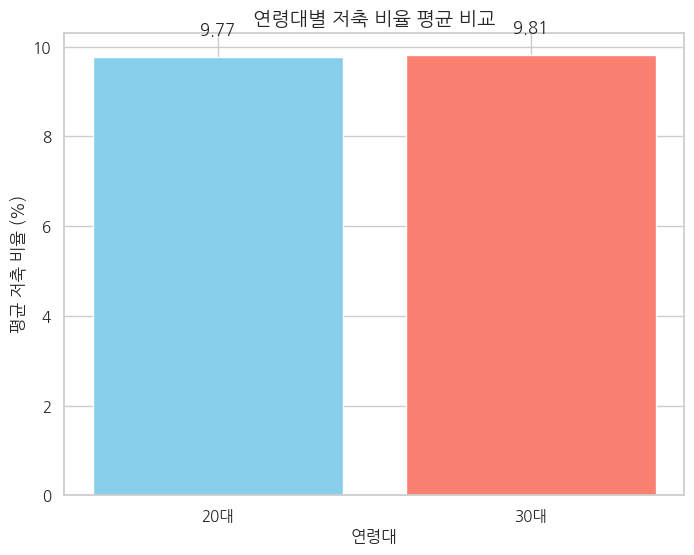

In [44]:
# 연령대별 저축 비율 평균을 막대 그래프로 시각화
age_groups = ['20대', '30대']
avg_savings = [avg_savings_20s, avg_savings_30s]

plt.figure(figsize=(8, 6))
plt.bar(age_groups, avg_savings, color=['skyblue', 'salmon'])

# 그래프 제목 및 레이블 추가
plt.title('연령대별 저축 비율 평균 비교', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('평균 저축 비율 (%)', fontsize=12)

# 값 표시
for i, v in enumerate(avg_savings):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', fontsize=12)

plt.show()

- 2~30대 차이가 많이 날 줄 알았는데 차이가 별로 안남
    - 30대의 소득 외의 지출 감안
    - 20대와 30대 소득차이가 별로 안큰가..?

In [31]:
from scipy.stats import ttest_ind

# t-검정 수행 (20대와 30대의 저축 비율 차이 검정)
t_stat, p_value = ttest_ind(df_20s['Desired_Savings_Percentage'], df_30s['Desired_Savings_Percentage'])

print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")


T-Statistic: -0.45, P-Value: 0.6530


 - p-value가 0.6530으로 0.05보다 훨씬 크므로, 두 그룹 간의 저축 비율 차이는 통계적으로 유의미하지 않다 - 귀무가설

### 소득과 저축 비율 간의 상관 관계 확인

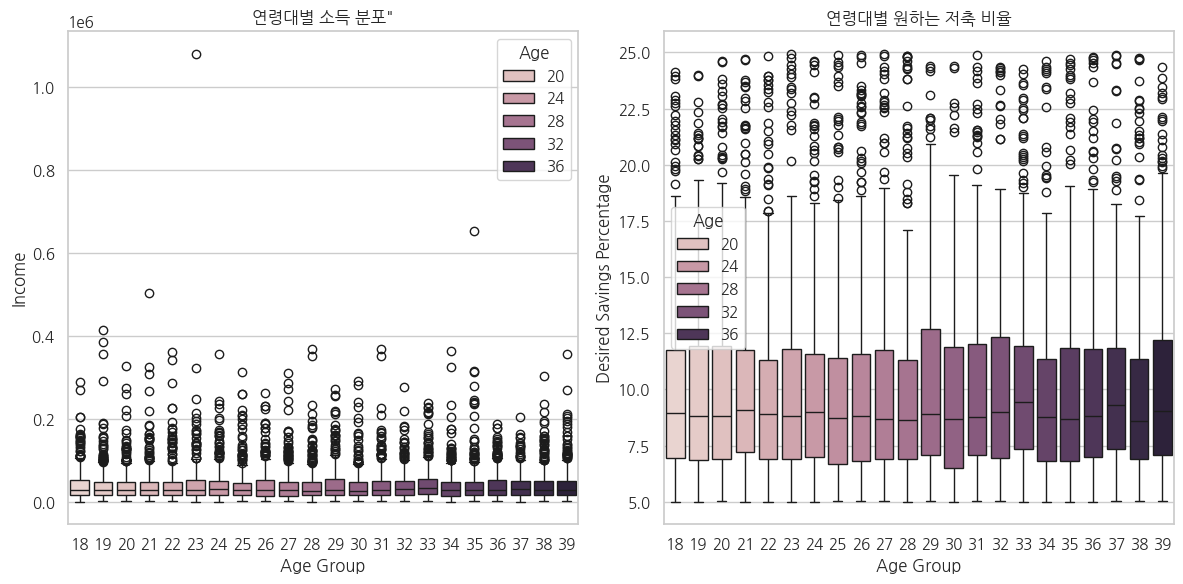

In [42]:
# 20대와 30대의 박스 플롯
plt.figure(figsize=(12, 6))

# 소득의 박스 플롯
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', y='Income', data=df_indian[df_indian['Age'] < 40], hue='Age')
plt.title('연령대별 소득 분포"')
plt.xlabel('Age Group')
plt.ylabel('Income')

# 저축 비율의 박스 플롯
plt.subplot(1, 2, 2)
sns.boxplot(x='Age', y='Desired_Savings_Percentage', data=df_indian[df_indian['Age'] < 40], hue='Age')
plt.title('연령대별 원하는 저축 비율')
plt.xlabel('Age Group')
plt.ylabel('Desired Savings Percentage')

plt.tight_layout()
plt.show()

In [33]:
#상관 관계 분석: 소득과 저축 비율 간의 상관 관계를 확인합니다.
correlation = df_indian[['Income', 'Desired_Savings_Percentage']].corr()
correlation

,Income,Desired_Savings_Percentage
Income,1.000000,0.776295
Desired_Savings_Percentage,0.776295,1.000000


- 이 상관 계수는 소득이 저축 비율에 상당히 영향을 미친다고 해석

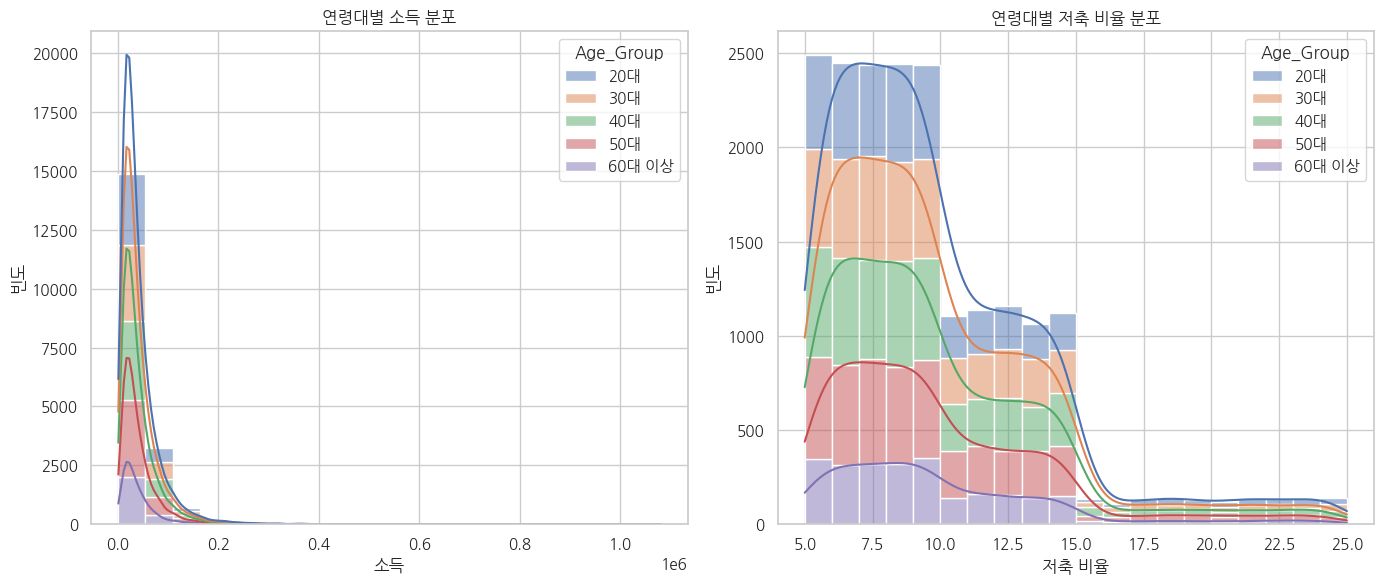

In [43]:
# 연령대별 소득 분포 히스토그램
plt.figure(figsize=(14, 6))

# 소득 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(data=df_indian, x='Income', hue='Age_Group', kde=True, multiple='stack', bins=20)
plt.title('연령대별 소득 분포')
plt.xlabel('소득')
plt.ylabel('빈도')

# 연령대별 저축 비율 히스토그램
plt.subplot(1, 2, 2)
sns.histplot(data=df_indian, x='Desired_Savings_Percentage', hue='Age_Group', kde=True, multiple='stack', bins=20)
plt.title('연령대별 저축 비율 분포')
plt.xlabel('저축 비율')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()

/tmp/ipykernel_19498/2253314446.py:31: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


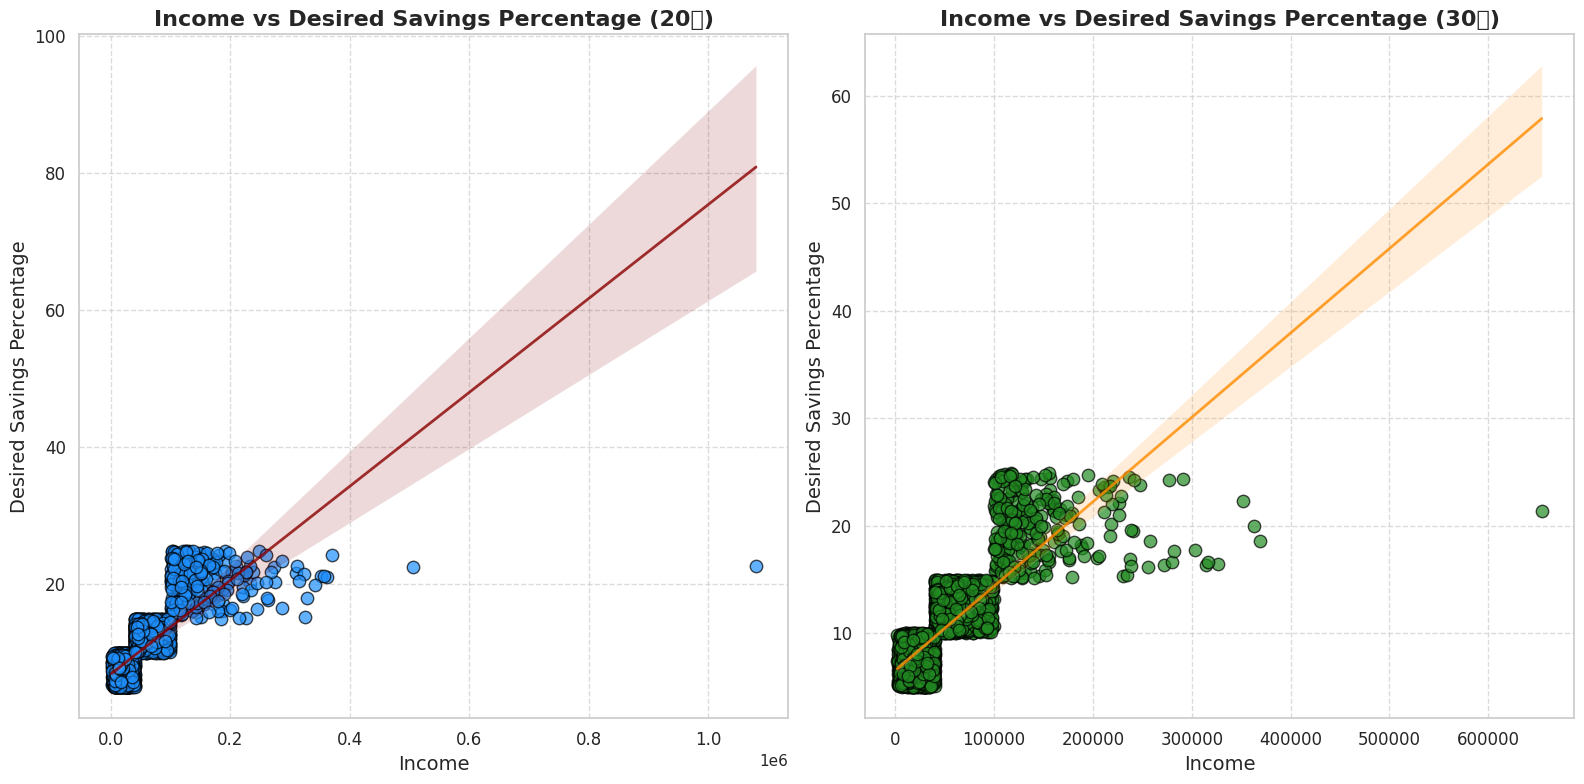

In [34]:
sns.set(style="whitegrid")

# 20대와 30대의 산점도에 회귀선 추가
plt.figure(figsize=(16, 8))

# 20대 산점도 및 회귀선
plt.subplot(1, 2, 1)
sns.regplot(x='Income', y='Desired_Savings_Percentage', data=df_20s,
            scatter_kws={'color': 'dodgerblue', 's': 80, 'edgecolor': 'black', 'alpha': 0.7},
            line_kws={'color': 'darkred', 'linewidth': 2, 'alpha': 0.8})
plt.title('Income vs Desired Savings Percentage (20대)', fontsize=16, weight='bold')
plt.xlabel('Income', fontsize=14)
plt.ylabel('Desired Savings Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


# 30대 산점도 및 회귀선
plt.subplot(1, 2, 2)
sns.regplot(x='Income', y='Desired_Savings_Percentage', data=df_30s,
            scatter_kws={'color': 'forestgreen', 's': 80, 'edgecolor': 'black', 'alpha': 0.7},
            line_kws={'color': 'darkorange', 'linewidth': 2, 'alpha': 0.8})
plt.title('Income vs Desired Savings Percentage (30대)', fontsize=16, weight='bold')
plt.xlabel('Income', fontsize=14)
plt.ylabel('Desired Savings Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
